In [7]:
from qiskit import QuantumCircuit, execute, Aer
import numpy as np

# Create a quantum circuit with 2 qubits and 1 classical bit
qc = QuantumCircuit(2, 1)

#num1 is for 1st number and num2 is for second number
def find_the_largest_number(num1, num2):
       
    # Initialize the qubits to the input integers
    if num1 < 0:
        qc.x(0)  # Apply a NOT gate to qubit 0 if num1 is negative
    qc.initialize([1, 0], 1)  # Initialize qubit 1 to |0⟩ or |1⟩ depending on num2
    qc.rz(num2 * (2 * np.pi / 2**2), 1)  # Rotate qubit 1 by an angle proportional to num2
    
    # Compare the qubits
    qc.h(0)  # Apply a Hadamard gate to qubit 0
    qc.cx(0, 1)  # Apply a CNOT gate with qubit 0 as control and qubit 1 as target
    qc.h(0)  # Apply another Hadamard gate to qubit 0
    
    # Measure qubit 0 and return the result
    qc.measure(0, 0)
    backend = Aer.get_backend('qasm_simulator')
    counts = execute(qc, backend, shots=1).result().get_counts()
    
    if '0' in counts:
        return num2
    else:
        return num1


-1000


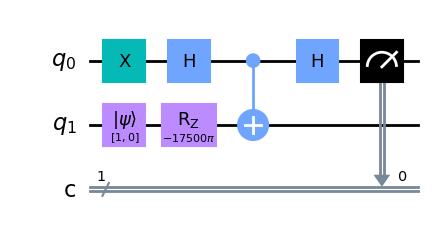

In [8]:
#Testing the circuit, here res is the result
res = find_the_largest_number(-1000,-35000)
print(res) #it will print the largest number
qc.draw(output='mpl') #it will print the circuit implemented